<a href="https://colab.research.google.com/github/Manasapothakamuru/DataworldDuplicateQuestions/blob/main/DataWorldDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
from bs4 import BeautifulSoup
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.cluster import DBSCAN
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import silhouette_score
from nltk.corpus import stopwords



In [ ]:
df= pd.read_csv('dataworld_duplicate_questions.csv')

In [ ]:
new_df=df.sample(30000, random_state=2)

In [ ]:
new_df.head()

,index,id,qid1,qid2,question1,question2,is_duplicate
297803,297803,349003,683776,683777,how many gallons are in a 100 lb propane tank,how much propane can a 2 5 lb tank hold,0
99927,99927,117051,232011,232012,is it theoretically possible to travel through...,is it possible to travel to alternate universe,1
175435,175435,205528,405483,405484,how do you serve pierogi,what are some great ways to serve pierogies,1
268694,268694,314880,617951,617952,which is the best attack strategy for th5 in c...,clash of clans how can i make my base stronge...,0
232503,232503,272524,535944,535945,which company is better for a fresher to join ...,which is better to join as a fresher cognizan...,0


In [ ]:
def preprocess(q):

    q = str(q).lower().strip()

    # Replace special characters with string equivalents
    q = q.replace('%', ' percent')
    q = q.replace('$', ' dollar ')
    q = q.replace('₹', ' rupee ')
    q = q.replace('€', ' euro ')
    q = q.replace('@', ' at ')


    q = q.replace('[math]', '')


    q = q.replace(',000,000,000 ', 'b ')
    q = q.replace(',000,000 ', 'm ')
    q = q.replace(',000 ', 'k ')
    q = re.sub(r'([0-9]+)000000000', r'\1b', q)
    q = re.sub(r'([0-9]+)000000', r'\1m', q)
    q = re.sub(r'([0-9]+)000', r'\1k', q)


    contractions = {
    "ain't": "am not",
    "aren't": "are not",
    "can't": "can not",
    "can't've": "can not have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "i would",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
    }

    q_decontracted = []

    for word in q.split():
        if word in contractions:
            word = contractions[word]

        q_decontracted.append(word)

    q = ' '.join(q_decontracted)
    q = q.replace("'ve", " have")
    q = q.replace("n't", " not")
    q = q.replace("'re", " are")
    q = q.replace("'ll", " will")

    # Removing HTML tags
    q = BeautifulSoup(q)
    q = q.get_text()

    # Remove punctuations
    pattern = re.compile('\W')
    q = re.sub(pattern, ' ', q).strip()


    return q

In [ ]:
preprocess("I can't come tomorrow.")

'i can not come tomorrow'

In [ ]:
new_df['question1']= new_df['question1'].apply(preprocess)
new_df['question2']= new_df['question2'].apply(preprocess)

In [ ]:
new_df.head()

,index,id,qid1,qid2,question1,question2,is_duplicate
297803,297803,349003,683776,683777,how many gallons are in a 100 lb propane tank,how much propane can a 2 5 lb tank hold,0
99927,99927,117051,232011,232012,is it theoretically possible to travel through...,is it possible to travel to alternate universe,1
175435,175435,205528,405483,405484,how do you serve pierogi,what are some great ways to serve pierogies,1
268694,268694,314880,617951,617952,which is the best attack strategy for th5 in c...,clash of clans how can i make my base stronger...,0
232503,232503,272524,535944,535945,which company is better for a fresher to join ...,which is better to join as a fresher cognizant...,0


In [ ]:
#Length of each Question
new_df['q1_len']= new_df['question1'].str.len()
new_df['q2_len']= new_df['question2'].str.len()

In [ ]:
new_df.head()

,index,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len
297803,297803,349003,683776,683777,how many gallons are in a 100 lb propane tank,how much propane can a 2 5 lb tank hold,0,45,39
99927,99927,117051,232011,232012,is it theoretically possible to travel through...,is it possible to travel to alternate universe,1,64,46
175435,175435,205528,405483,405484,how do you serve pierogi,what are some great ways to serve pierogies,1,24,43
268694,268694,314880,617951,617952,which is the best attack strategy for th5 in c...,clash of clans how can i make my base stronge...,0,59,63
232503,232503,272524,535944,535945,which company is better for a fresher to join ...,which is better to join as a fresher cognizan...,0,80,60


In [ ]:
#Number of words present in each question
new_df['q1_words']=new_df['question1'].str.split().apply(len)
new_df['q2_words']=new_df['question2'].str.split().apply(len)

In [ ]:
new_df.head()

,index,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_words,q2_words
297803,297803,349003,683776,683777,how many gallons are in a 100 lb propane tank,how much propane can a 2 5 lb tank hold,0,45,39,10,10
99927,99927,117051,232011,232012,is it theoretically possible to travel through...,is it possible to travel to alternate universe,1,64,46,9,8
175435,175435,205528,405483,405484,how do you serve pierogi,what are some great ways to serve pierogies,1,24,43,5,8
268694,268694,314880,617951,617952,which is the best attack strategy for th5 in c...,clash of clans how can i make my base stronger...,0,59,62,12,12
232503,232503,272524,535944,535945,which company is better for a fresher to join ...,which is better to join as a fresher cognizant...,0,79,59,15,11


In [ ]:
#Number of common words present in both the questions
#new_df['common_words']= len(set((new_df['question1'].str.split()).intersection(new_df['question2'].str.split())))
new_df['common_words'] = new_df.apply(lambda row: len(set(row['question1'].split()).intersection(row['question2'].split())), axis=1)


In [ ]:
new_df.head()

,index,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_words,q2_words,common_words
297803,297803,349003,683776,683777,how many gallons are in a 100 lb propane tank,how much propane can a 2 5 lb tank hold,0,45,39,10,10,5
99927,99927,117051,232011,232012,is it theoretically possible to travel through...,is it possible to travel to alternate universe,1,64,46,9,8,6
175435,175435,205528,405483,405484,how do you serve pierogi,what are some great ways to serve pierogies,1,24,43,5,8,1
268694,268694,314880,617951,617952,which is the best attack strategy for th5 in c...,clash of clans how can i make my base stronger...,0,59,62,12,12,3
232503,232503,272524,535944,535945,which company is better for a fresher to join ...,which is better to join as a fresher cognizant...,0,79,59,15,11,9


In [ ]:
# Total number of words present in both the questions
new_df['total_words']=new_df.apply(lambda row: row['q1_words']+(row['q2_words']), axis=1)

In [ ]:
new_df.head()

,index,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_words,q2_words,common_words,total_words
297803,297803,349003,683776,683777,how many gallons are in a 100 lb propane tank,how much propane can a 2 5 lb tank hold,0,45,39,10,10,5,20
99927,99927,117051,232011,232012,is it theoretically possible to travel through...,is it possible to travel to alternate universe,1,64,46,9,8,6,17
175435,175435,205528,405483,405484,how do you serve pierogi,what are some great ways to serve pierogies,1,24,43,5,8,1,13
268694,268694,314880,617951,617952,which is the best attack strategy for th5 in c...,clash of clans how can i make my base stronger...,0,59,62,12,12,3,24
232503,232503,272524,535944,535945,which company is better for a fresher to join ...,which is better to join as a fresher cognizant...,0,79,59,15,11,9,26


In [ ]:
# Ratio of common and total words
new_df['word_share']=round(new_df['total_words']/new_df['common_words'],2)

In [ ]:
new_df.head()

,index,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_words,q2_words,common_words,total_words,word_share
297803,297803,349003,683776,683777,how many gallons are in a 100 lb propane tank,how much propane can a 2 5 lb tank hold,0,45,39,10,10,5,20,4.00
99927,99927,117051,232011,232012,is it theoretically possible to travel through...,is it possible to travel to alternate universe,1,64,46,9,8,6,17,2.83
175435,175435,205528,405483,405484,how do you serve pierogi,what are some great ways to serve pierogies,1,24,43,5,8,1,13,13.00
268694,268694,314880,617951,617952,which is the best attack strategy for th5 in c...,clash of clans how can i make my base stronger...,0,59,62,12,12,3,24,8.00
232503,232503,272524,535944,535945,which company is better for a fresher to join ...,which is better to join as a fresher cognizant...,0,79,59,15,11,9,26,2.89


In [ ]:
def fetch_token_features(row):

    q1 = row['question1']
    q2 = row['question2']

    SAFE_DIV = 0.0001

    STOP_WORDS = stopwords.words("english")

    token_features = [0.0]*8

    q1_tokens = q1.split()
    q2_tokens = q2.split()

    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return token_features

    # non-stopwords
    q1_words = set([word for word in q1_tokens if word not in STOP_WORDS])
    q2_words = set([word for word in q2_tokens if word not in STOP_WORDS])

    #stopwords
    q1_stops = set([word for word in q1_tokens if word in STOP_WORDS])
    q2_stops = set([word for word in q2_tokens if word in STOP_WORDS])

    #common non-stopwords
    common_word_count = len(q1_words.intersection(q2_words))

    # common stopwords
    common_stop_count = len(q1_stops.intersection(q2_stops))

    #common Tokens
    common_token_count = len(set(q1_tokens).intersection(set(q2_tokens)))


    token_features[0] = common_word_count / (min(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[1] = common_word_count / (max(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[2] = common_stop_count / (min(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[3] = common_stop_count / (max(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[4] = common_token_count / (min(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    token_features[5] = common_token_count / (max(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)

    # Last word of both question is same or not
    token_features[6] = int(q1_tokens[-1] == q2_tokens[-1])

    # First word of both question is same or not
    token_features[7] = int(q1_tokens[0] == q2_tokens[0])

    return token_features


In [ ]:
import nltk
nltk.download('stopwords')
token_features = new_df.apply(fetch_token_features, axis=1)

new_df["cwc_min"]       = list(map(lambda x: x[0], token_features))
new_df["cwc_max"]       = list(map(lambda x: x[1], token_features))
new_df["csc_min"]       = list(map(lambda x: x[2], token_features))
new_df["csc_max"]       = list(map(lambda x: x[3], token_features))
new_df["ctc_min"]       = list(map(lambda x: x[4], token_features))
new_df["ctc_max"]       = list(map(lambda x: x[5], token_features))
new_df["last_word_eq"]  = list(map(lambda x: x[6], token_features))
new_df["first_word_eq"] = list(map(lambda x: x[7], token_features))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
new_df.head()

,index,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_words,...,total_words,word_share,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq
297803,297803,349003,683776,683777,how many gallons are in a 100 lb propane tank,how much propane can a 2 5 lb tank hold,0,45,39,10,...,20,4.00,0.499992,0.428565,0.666644,0.499988,0.499995,0.499995,0,1
99927,99927,117051,232011,232012,is it theoretically possible to travel through...,is it possible to travel to alternate universe,1,64,46,9,...,17,2.83,0.749981,0.599988,0.999967,0.749981,0.749991,0.666659,1,1
175435,175435,205528,405483,405484,how do you serve pierogi,what are some great ways to serve pierogies,1,24,43,5,...,13,13.00,0.499975,0.249994,0.000000,0.000000,0.199996,0.124998,0,0
268694,268694,314880,617951,617952,which is the best attack strategy for th5 in c...,clash of clans how can i make my base stronger...,0,59,62,12,...,24,8.00,0.333328,0.333328,0.166664,0.166664,0.249998,0.249998,0,0
232503,232503,272524,535944,535945,which company is better for a fresher to join ...,which is better to join as a fresher cognizant...,0,79,59,15,...,26,2.89,0.799984,0.571420,0.833319,0.624992,0.818174,0.599996,0,1


minimum characters 1
maximum characters 312
average num of characters 53


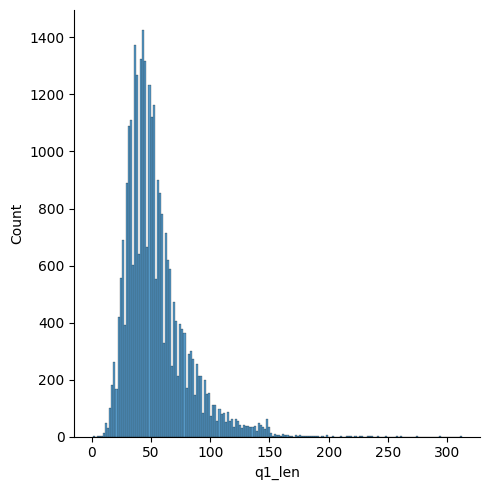

In [ ]:
#Graphical analysis for avg, min, max length of questions in Q1 column
sns.displot(new_df['q1_len'])
print('minimum characters',new_df['q1_len'].min())
print('maximum characters',new_df['q1_len'].max())
print('average num of characters',int(new_df['q1_len'].mean()))

minimum characters 4
maximum characters 308
average num of characters 53


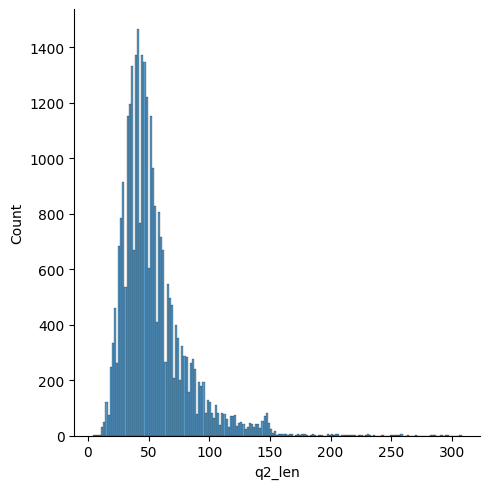

In [ ]:
#Graphical analysis for avg, min, max length of questions in Q2 column
sns.displot(new_df['q2_len'])
print('minimum characters',new_df['q2_len'].min())
print('maximum characters',new_df['q2_len'].max())
print('average num of characters',int(new_df['q2_len'].mean()))

minimum words 1
maximum words 69
average num of words 10


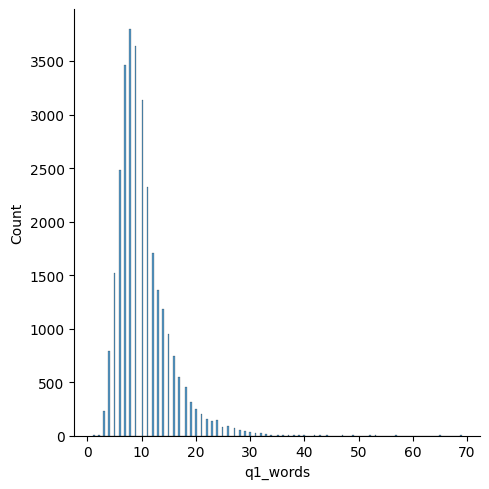

In [ ]:
#Graphical analysis for avg, min,max num of words in Q1 column
sns.displot(new_df['q1_words'])
print('minimum words',new_df['q1_words'].min())
print('maximum words',new_df['q1_words'].max())
print('average num of words',int(new_df['q1_words'].mean()))

minimum words 1
maximum words 67
average num of words 10


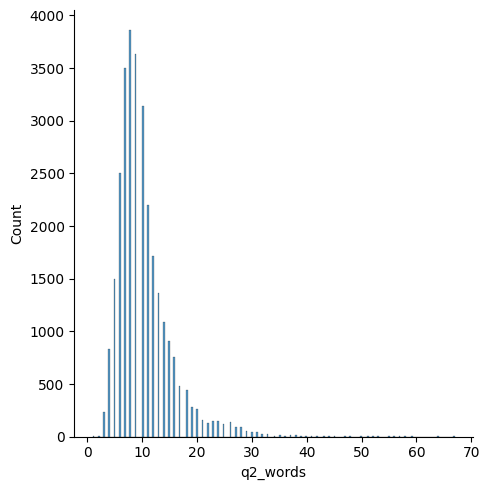

In [ ]:
#Graphical analysis for avg, min,max num of words in Q2 column
sns.displot(new_df['q2_words'])
print('minimum words',new_df['q2_words'].min())
print('maximum words',new_df['q2_words'].max())
print('average num of words',int(new_df['q2_words'].mean()))

<ipython-input-26-c53c0ffc3202>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df[new_df['is_duplicate'] == 0]['common_words'],label='non-duplicate')
<ipython-input-26-c53c0ffc3202>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df[new_df['is_duplicate'] == 1]['common_words'],label='

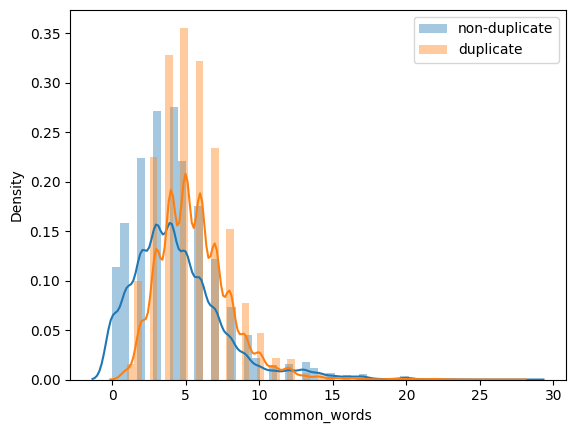

In [ ]:
# common words
sns.distplot(new_df[new_df['is_duplicate'] == 0]['common_words'],label='non-duplicate')
sns.distplot(new_df[new_df['is_duplicate'] == 1]['common_words'],label='duplicate')
plt.legend()
plt.show()

<ipython-input-27-2cbf20e30e15>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df[new_df['is_duplicate'] == 0]['total_words'],label='non duplicate')
<ipython-input-27-2cbf20e30e15>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df[new_df['is_duplicate'] == 1]['total_words'],label='du

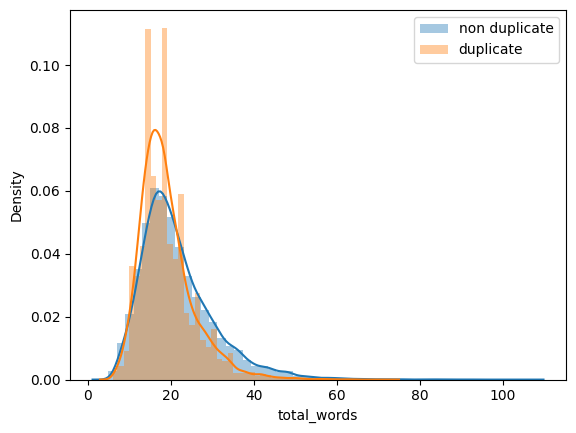

In [ ]:
# total words
sns.distplot(new_df[new_df['is_duplicate'] == 0]['total_words'],label='non duplicate')
sns.distplot(new_df[new_df['is_duplicate'] == 1]['total_words'],label='duplicate')
plt.legend()
plt.show()

<ipython-input-28-3ac688b8f848>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(filtered_df[filtered_df['is_duplicate'] == 0]['word_share'],label='non duplicate',bins=50)
<ipython-input-28-3ac688b8f848>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(filtered_df[filtered_df['is_duplicate'] == 

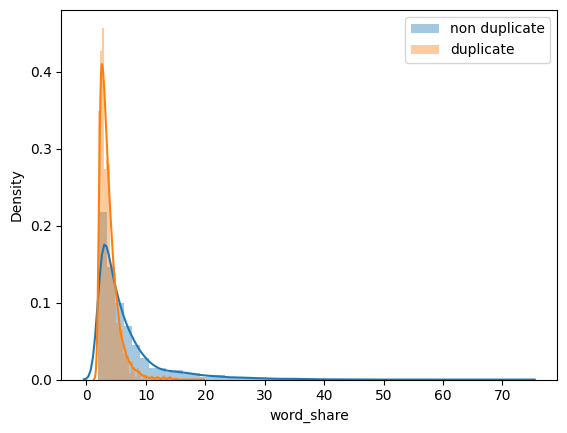

In [ ]:
# word share
# Filter out non-finite values
non_finite_values = np.logical_not(np.isfinite(new_df['word_share']))
filtered_df = new_df[np.logical_not(non_finite_values)]

sns.distplot(filtered_df[filtered_df['is_duplicate'] == 0]['word_share'],label='non duplicate',bins=50)
sns.distplot(filtered_df[filtered_df['is_duplicate'] == 1]['word_share'],label='duplicate',bins=50)
plt.legend()
plt.show()

In [ ]:
ques_df = new_df[['question1','question2']]
ques_df.head()

,question1,question2
297803,how many gallons are in a 100 lb propane tank,how much propane can a 2 5 lb tank hold
99927,is it theoretically possible to travel through...,is it possible to travel to alternate universe
175435,how do you serve pierogi,what are some great ways to serve pierogies
268694,which is the best attack strategy for th5 in c...,clash of clans how can i make my base stronger...
232503,which company is better for a fresher to join ...,which is better to join as a fresher cognizant...


In [ ]:
final_df = new_df.drop(columns=['index','id','qid1','qid2','question1','question2'])
print(final_df.shape)
final_df.head()


(30000, 16)


,is_duplicate,q1_len,q2_len,q1_words,q2_words,common_words,total_words,word_share,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq
297803,0,45,39,10,10,5,20,4.00,0.499992,0.428565,0.666644,0.499988,0.499995,0.499995,0,1
99927,1,64,46,9,8,6,17,2.83,0.749981,0.599988,0.999967,0.749981,0.749991,0.666659,1,1
175435,1,24,43,5,8,1,13,13.00,0.499975,0.249994,0.000000,0.000000,0.199996,0.124998,0,0
268694,0,59,62,12,12,3,24,8.00,0.333328,0.333328,0.166664,0.166664,0.249998,0.249998,0,0
232503,0,79,59,15,11,9,26,2.89,0.799984,0.571420,0.833319,0.624992,0.818174,0.599996,0,1


In [ ]:
questions = list(ques_df['question1']) + list(ques_df['question2'])

tfidf_vectorizer = TfidfVectorizer(max_features=3000)
q1_arr, q2_arr = np.vsplit(tfidf_vectorizer.fit_transform(questions).toarray(),2)

In [ ]:
temp_df1 = pd.DataFrame(q1_arr, index= ques_df.index)
temp_df2 = pd.DataFrame(q2_arr, index= ques_df.index)
temp_df = pd.concat([temp_df1, temp_df2], axis=1)
temp_df.shape

(30000, 6000)

In [ ]:
final_df = pd.concat([final_df, temp_df], axis=1)
print(final_df.shape)
final_df.head()

(30000, 6016)


,is_duplicate,q1_len,q2_len,q1_words,q2_words,common_words,total_words,word_share,cwc_min,cwc_max,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
297803,0,45,39,10,10,5,20,4.00,0.499992,0.428565,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99927,1,64,46,9,8,6,17,2.83,0.749981,0.599988,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
175435,1,24,43,5,8,1,13,13.00,0.499975,0.249994,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
268694,0,59,62,12,12,3,24,8.00,0.333328,0.333328,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
232503,0,79,59,15,11,9,26,2.89,0.799984,0.571420,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
final_df.dropna(inplace=True)
indices_to_keep = ~final_df.isin([np.nan, np.inf, -np.inf]).any(axis=1)
final_df = final_df[indices_to_keep].astype(np.float64)
final_df.head()

,is_duplicate,q1_len,q2_len,q1_words,q2_words,common_words,total_words,word_share,cwc_min,cwc_max,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
297803,0.0,45.0,39.0,10.0,10.0,5.0,20.0,4.00,0.499992,0.428565,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99927,1.0,64.0,46.0,9.0,8.0,6.0,17.0,2.83,0.749981,0.599988,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
175435,1.0,24.0,43.0,5.0,8.0,1.0,13.0,13.00,0.499975,0.249994,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
268694,0.0,59.0,62.0,12.0,12.0,3.0,24.0,8.00,0.333328,0.333328,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
232503,0.0,79.0,59.0,15.0,11.0,9.0,26.0,2.89,0.799984,0.571420,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
X_train,X_test,y_train,y_test = train_test_split(final_df.iloc[:,1:].values,final_df.iloc[:,0].values,test_size=0.2,random_state=1)

In [ ]:
pip install pyod


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 2.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyod: filename=pyod-1.1.3-py3-none-any.whl size=190251 sha256=28ecce1f2625cfbcab9f3cfb9fb39f9566de597028582a3cc1ba24c75a768eae
  Stored in directory: /root/.cache/pip/wheels/05/f8/db/124d43bec122d6ec0ab3713fadfe25ebed8af52ec561682b4e
Successfully built pyod


In [ ]:
dbscan = DBSCAN(eps=4.8, min_samples=2)
train_cluster_labels = dbscan.fit_predict(X_train)
test_cluster_labels = dbscan.fit_predict(X_test)
#train_accuracy = accuracy_score(np.zeros_like(train_cluster_labels), train_cluster_labels != -1)
#test_accuracy = accuracy_score(y_test, test_cluster_labels)
#print("Accuracy on training set:", train_accuracy)
#print("Accuracy on test set:", test_accuracy)

silhouette_avg = silhouette_score(X_train, train_cluster_labels)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: -0.346655580621904


In [ ]:
no_clusters = len(np.unique(train_cluster_labels) )
no_noise = np.sum(np.array(train_cluster_labels) == -1, axis=0)

print('Estimated no. of clusters: %d' % no_clusters)
print('Estimated no. of noise points: %d' % no_noise)

for cluster_label in np.unique(train_cluster_labels):
    if cluster_label == -1:
        continue  # Skip noise points
    cluster_data = X_train[train_cluster_labels == cluster_label]
    print(f"Number of data points in cluster {cluster_label}: {len(cluster_data)}")
    print(cluster_data)

Estimated no. of clusters: 300
Estimated no. of noise points: 1454
Number of data points in cluster 0: 20654
[[ 60.  62.   9. ...   0.   0.   0.]
 [ 96.  76.  19. ...   0.   0.   0.]
 [ 48.  44.   9. ...   0.   0.   0.]
 ...
 [ 58.  69.  11. ...   0.   0.   0.]
 [118. 125.  21. ...   0.   0.   0.]
 [ 78.  71.  12. ...   0.   0.   0.]]
Number of data points in cluster 1: 5
[[122.  71.  23. ...   0.   0.   0.]
 [124.  71.  25. ...   0.   0.   0.]
 [123.  72.  21. ...   0.   0.   0.]
 [122.  72.  23. ...   0.   0.   0.]
 [123.  69.  22. ...   0.   0.   0.]]
Number of data points in cluster 2: 4
[[109.  37.  25. ...   0.   0.   0.]
 [112.  36.  23. ...   0.   0.   0.]
 [109.  35.  23. ...   0.   0.   0.]
 [110.  38.  21. ...   0.   0.   0.]]
Number of data points in cluster 3: 2
[[ 83. 113.  18. ...   0.   0.   0.]
 [ 82. 112.  16. ...   0.   0.   0.]]
Number of data points in cluster 4: 3
[[114.  62.  18. ...   0.   0.   0.]
 [111.  60.  20. ...   0.   0.   0.]
 [112.  59.  18. ...   0.  

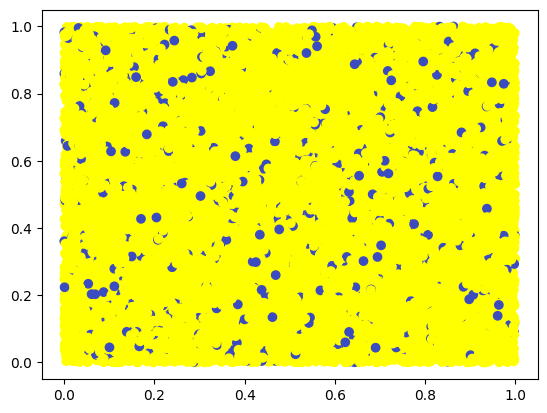

In [ ]:
import matplotlib.pyplot as plt
colors = list(map(lambda x: '#3b4cc0' if x == -1 else '#FFFF00', train_cluster_labels))
x = np.random.rand(23076)
y = np.random.rand(23076)
plt.scatter(x, y, c=colors, marker="o", picker=True)
plt.show()

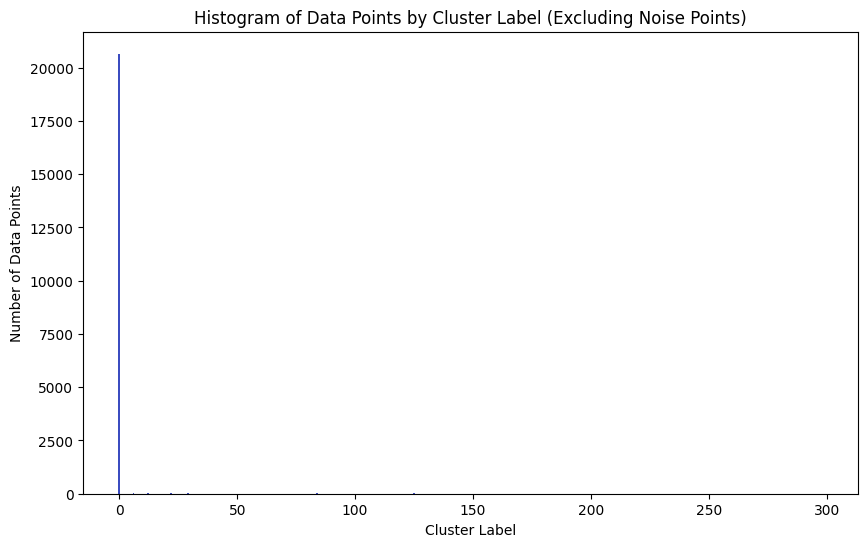

In [ ]:
filtered_labels = [label for label in train_cluster_labels if label != -1]

# Count the occurrences of each non-noise cluster label
cluster_counts = np.bincount(filtered_labels)

# Define colors for bars
colors = ['#3b4cc0' for _ in range(len(cluster_counts))]

# Generate cluster labels for x-axis
cluster_labels = np.arange(len(cluster_counts))

# Create histogram
plt.figure(figsize=(10, 6))
plt.bar(cluster_labels, cluster_counts, color=colors)

# Add labels and title
plt.xlabel('Cluster Label')
plt.ylabel('Number of Data Points')
plt.title('Histogram of Data Points by Cluster Label (Excluding Noise Points)')

# Show plot
plt.show()
